# 패키지 불러오기

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import warnings

warnings.filterwarnings(action='ignore')
%matplotlib inline

# 데이터 이해하기

### 목표 : 은행 신용 카드 서비스 이탈 고객 예측 모델 만들기!

## 칼럼 설명

- feature
 - Customer_Age : 고객의 나이
 - Gender : 성별 (M=Male, F=Female)
 - Dependent_count : 부양하는 가족의 수
 - Education_Level : 고객의 최종 학력 (example: high school, college graduate, etc.)
 - Marital_Status : 결혼 상태 (Married, Single, Divorced, Unknown)
 - Income_Category : 소득 범주 (< $40K, $40K - 60K, $60K - $80K, $80K-$120K, etc.)
 - Card_Category : Product Variable - Type of Card (Blue, Silver, Gold, Platinum)
 - Months_on_book : Period of relationship with bank
 - Total_Relationship_Count : Total no. of products held by the customer
 - Months_Inactive_12_mon : No. of months inactive in the last 12 months
 - Contacts_Count_12_mon : No. of Contacts in the last 12 months
 - Credit_Limit : Credit Limit on the Credit Card
 - Total_Revolving_Bal : Total Revolving Balance on the Credit Card
 - Avg_Open_To_Buy : Open to Buy Credit Line (Average of last 12 months)
 - Total_Amt_Chng_Q4_Q1 : Change in Transaction Amount (Q4 over Q1)
 - Total_Trans_Amt : Total Transaction Amount (Last 12 months)
 - Total_Trans_Ct : Total Transaction Count (Last 12 months)
 - Total_Ct_Chng_Q4_Q1 : Change in Transaction Count (Q4 over Q1)
 - Avg_Utilization_Ratio : Average Card Utilization Ratio

- target
 - Attrition_Flag : 고객 활동 변수 / Existing Customer - 0, Attrited Customer - 1
1. 은행 카드 서비스 담당자의 입장

2. 카드 서비스를 이용하는 고객의 입장

위 두 가지를 생각하면서 데이터를 분석하는 것은 어떨까요??

데이터 출처: https://www.kaggle.com/sakshigoyal7/credit-card-customers

## 평가방식

평가방식은 Logloss이기 때문에 predict_proba을 통해서 각 클래스의 예측 확률을 구하는 방식으로 에측을 해야합니다!

## 대회 주소
https://www.kaggle.com/t/cd058141be084c4f81c9df010c587ae4

In [2]:
# 데이터의 경로 각자에 맞추어서 변경해주세요
data_dir = 'C:/Users/jisuj/Desktop/tobigs/17기 5주차 Ensemble 강의 자료/17기 5주차 Ensemble 강의 자료/'

train = pd.read_csv(data_dir + 'train.csv')
test = pd.read_csv(data_dir + 'test.csv')
submission = pd.read_csv(data_dir + 'sample_submission.csv')

In [3]:
train.head()

,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Attrition_Flag
0,44,F,1,Unknown,Divorced,Unknown,Blue,36,3,2,1,17116.0,1289,15827.0,0.559,3632,50,0.923,0.075,0
1,42,M,3,Uneducated,Single,$60K - $80K,Blue,30,4,2,3,8302.0,1294,7008.0,0.558,3221,66,0.610,0.156,0
2,57,M,0,Uneducated,Divorced,$80K - $120K,Blue,39,4,4,3,2795.0,1832,963.0,0.839,4679,67,0.861,0.655,0
3,26,F,1,Graduate,Single,$40K - $60K,Blue,20,6,3,3,1438.3,673,765.3,0.595,2167,48,0.412,0.468,0
4,38,F,0,Uneducated,Married,Less than $40K,Blue,26,5,1,4,2230.0,0,2230.0,0.896,3766,63,0.909,0.000,0


In [4]:
test.head()

,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,53,F,2,College,Single,Less than $40K,Blue,45,6,3,3,6210.0,1083,5127.0,0.621,3095,62,0.590,0.174
1,52,M,1,College,Married,$80K - $120K,Blue,48,4,3,3,2066.0,1601,465.0,0.742,1578,41,0.414,0.775
2,27,M,0,Unknown,Married,$40K - $60K,Blue,14,4,1,4,3823.0,2130,1693.0,0.371,2026,49,0.441,0.557
3,43,M,3,Unknown,Single,$60K - $80K,Blue,34,6,2,0,13771.0,2517,11254.0,0.501,1510,42,0.750,0.183
4,55,F,2,High School,Married,$40K - $60K,Blue,42,2,2,3,5431.0,2007,3424.0,0.661,4569,82,0.608,0.370


In [5]:
submission.head()

,id,Existing Customer,Attrited Customer
0,0,0,1
1,1,0,1
2,2,0,1
3,3,0,1
4,4,0,1


# 데이터 전처리


In [6]:
train.shape

(8101, 20)

In [7]:
test.shape

(2026, 19)

In [8]:
train.isna().sum()

Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
Attrition_Flag              0
dtype: int64

In [9]:
test.isna().sum()

Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

데이터에 결측치는 존재하지 않는 것으로 보입니다.

하지만 진짜 결측치가 존재하지 않을까요?

결측치가 다른 이름으로 기록되어 있을 수도 있고 0으로 기록되어 있을 수도 있습니다.

이 부분은 한번 EDA를 통해서 확인해보세요!

# EDA

정형데이터의 경우 feature engineering 이 모델의 성능에 정말 큰 영향을 주기 때문에 EDA를 통해서 얻은 인사이트를 바탕으로 최고의 feature를 만들어보세요! 

In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8101 entries, 0 to 8100
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer_Age              8101 non-null   int64  
 1   Gender                    8101 non-null   object 
 2   Dependent_count           8101 non-null   int64  
 3   Education_Level           8101 non-null   object 
 4   Marital_Status            8101 non-null   object 
 5   Income_Category           8101 non-null   object 
 6   Card_Category             8101 non-null   object 
 7   Months_on_book            8101 non-null   int64  
 8   Total_Relationship_Count  8101 non-null   int64  
 9   Months_Inactive_12_mon    8101 non-null   int64  
 10  Contacts_Count_12_mon     8101 non-null   int64  
 11  Credit_Limit              8101 non-null   float64
 12  Total_Revolving_Bal       8101 non-null   int64  
 13  Avg_Open_To_Buy           8101 non-null   float64
 14  Total_Am

In [11]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2026 entries, 0 to 2025
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer_Age              2026 non-null   int64  
 1   Gender                    2026 non-null   object 
 2   Dependent_count           2026 non-null   int64  
 3   Education_Level           2026 non-null   object 
 4   Marital_Status            2026 non-null   object 
 5   Income_Category           2026 non-null   object 
 6   Card_Category             2026 non-null   object 
 7   Months_on_book            2026 non-null   int64  
 8   Total_Relationship_Count  2026 non-null   int64  
 9   Months_Inactive_12_mon    2026 non-null   int64  
 10  Contacts_Count_12_mon     2026 non-null   int64  
 11  Credit_Limit              2026 non-null   float64
 12  Total_Revolving_Bal       2026 non-null   int64  
 13  Avg_Open_To_Buy           2026 non-null   float64
 14  Total_Am

In [12]:
from sklearn.preprocessing import LabelEncoder

In [13]:
# Label Encoder
# 문자형 -> 숫자형

train_label = train.copy()
for col in ['Gender','Education_Level','Marital_Status','Income_Category','Card_Category']:
    label = LabelEncoder()
    train_label[col] = label.fit_transform(train_label[col])
    print(dict(zip(label.classes_, label.transform(label.classes_))))

{'F': 0, 'M': 1}
{'College': 0, 'Doctorate': 1, 'Graduate': 2, 'High School': 3, 'Post-Graduate': 4, 'Uneducated': 5, 'Unknown': 6}
{'Divorced': 0, 'Married': 1, 'Single': 2, 'Unknown': 3}
{'$120K +': 0, '$40K - $60K': 1, '$60K - $80K': 2, '$80K - $120K': 3, 'Less than $40K': 4, 'Unknown': 5}
{'Blue': 0, 'Gold': 1, 'Platinum': 2, 'Silver': 3}


In [14]:
# 빈도수 확인
for col in train:
    print(train[col].value_counts())
    print('---------------------------------------')

44    400
45    399
49    388
47    386
48    381
46    380
43    366
50    363
42    339
51    321
41    303
52    302
53    295
40    290
39    271
54    255
38    239
55    217
37    214
56    197
36    183
57    179
35    154
58    132
59    132
34    115
60    102
33    101
32     83
62     79
65     78
61     74
31     72
26     64
30     56
63     52
29     49
64     33
27     26
28     24
68      2
66      2
73      1
70      1
67      1
Name: Customer_Age, dtype: int64
---------------------------------------
F    4286
M    3815
Name: Gender, dtype: int64
---------------------------------------
3    2206
2    2089
1    1491
4    1246
0     732
5     337
Name: Dependent_count, dtype: int64
---------------------------------------
Graduate         2535
High School      1609
Unknown          1220
Uneducated       1158
College           807
Post-Graduate     409
Doctorate         363
Name: Education_Level, dtype: int64
---------------------------------------
Married     3749
Single 

빈도수를 보면, Education_Level과 Marital_Status, Income_Category에서 Unknown이라는 결측치 값이 있다. 각각 1220, 584, 887개로 적지 않은 수임을 알 수 있고, 모두 범주형 변수이기 때문에 KNN으로 결측치를 대체

In [15]:
# Unknown값은 결측치임을 나타내기 위해 NaN 값으로 변경
for i in range(len(train_label['Education_Level'])):
    if train_label['Education_Level'][i] == 6:
        train_label['Education_Level'][i] = np.nan

In [16]:
for i in range(len(train_label['Marital_Status'])):
    if train_label['Marital_Status'][i] == 3:
        train_label['Marital_Status'][i] = np.nan

In [17]:
for i in range(len(train_label['Income_Category'])):
    if train_label['Income_Category'][i] == 5:
        train_label['Income_Category'][i] = np.nan

In [18]:
train_label

,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Attrition_Flag
0,44,0,1,NaN,0.0,NaN,0,36,3,2,1,17116.0,1289,15827.0,0.559,3632,50,0.923,0.075,0
1,42,1,3,5.0,2.0,2.0,0,30,4,2,3,8302.0,1294,7008.0,0.558,3221,66,0.610,0.156,0
2,57,1,0,5.0,0.0,3.0,0,39,4,4,3,2795.0,1832,963.0,0.839,4679,67,0.861,0.655,0
3,26,0,1,2.0,2.0,1.0,0,20,6,3,3,1438.3,673,765.3,0.595,2167,48,0.412,0.468,0
4,38,0,0,5.0,1.0,4.0,0,26,5,1,4,2230.0,0,2230.0,0.896,3766,63,0.909,0.000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8096,46,0,3,2.0,0.0,4.0,0,36,3,2,2,2391.0,1625,766.0,0.662,7649,101,0.603,0.680,0
8097,37,1,3,5.0,1.0,1.0,0,25,5,0,3,1438.3,0,1438.3,1.023,5046,77,0.925,0.000,0
8098,50,0,1,2.0,1.0,4.0,0,36,4,2,3,1438.3,0,1438.3,0.851,4765,71,1.088,0.000,0
8099,55,0,2,3.0,1.0,4.0,0,45,5,2,0,3187.0,2517,670.0,1.144,1627,38,0.652,0.790,0


In [19]:
from sklearn.impute import KNNImputer

In [20]:
# 세개의 주변 노드 이용
imputer = KNNImputer(n_neighbors=3)

In [21]:
train_emi = train_label.iloc[:,3:6]

In [22]:
train_emi_filled = imputer.fit_transform(train_emi)

In [23]:
train_emi_filled

array([[4.33333333, 0.        , 3.        ],
       [5.        , 2.        , 2.        ],
       [5.        , 0.        , 3.        ],
       ...,
       [2.        , 1.        , 4.        ],
       [3.        , 1.        , 4.        ],
       [5.        , 0.        , 2.        ]])

In [24]:
#예측값 넣어주기
train_label.iloc[:,3] = train_emi_filled[:,0]
train_label.iloc[:,4] = train_emi_filled[:,1]
train_label.iloc[:,5] = train_emi_filled[:,2]

In [25]:
train_label

,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Attrition_Flag
0,44,0,1,4.333333,0.0,3.0,0,36,3,2,1,17116.0,1289,15827.0,0.559,3632,50,0.923,0.075,0
1,42,1,3,5.000000,2.0,2.0,0,30,4,2,3,8302.0,1294,7008.0,0.558,3221,66,0.610,0.156,0
2,57,1,0,5.000000,0.0,3.0,0,39,4,4,3,2795.0,1832,963.0,0.839,4679,67,0.861,0.655,0
3,26,0,1,2.000000,2.0,1.0,0,20,6,3,3,1438.3,673,765.3,0.595,2167,48,0.412,0.468,0
4,38,0,0,5.000000,1.0,4.0,0,26,5,1,4,2230.0,0,2230.0,0.896,3766,63,0.909,0.000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8096,46,0,3,2.000000,0.0,4.0,0,36,3,2,2,2391.0,1625,766.0,0.662,7649,101,0.603,0.680,0
8097,37,1,3,5.000000,1.0,1.0,0,25,5,0,3,1438.3,0,1438.3,1.023,5046,77,0.925,0.000,0
8098,50,0,1,2.000000,1.0,4.0,0,36,4,2,3,1438.3,0,1438.3,0.851,4765,71,1.088,0.000,0
8099,55,0,2,3.000000,1.0,4.0,0,45,5,2,0,3187.0,2517,670.0,1.144,1627,38,0.652,0.790,0


전처리 과정을 test set에서도 실행

In [26]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2026 entries, 0 to 2025
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer_Age              2026 non-null   int64  
 1   Gender                    2026 non-null   object 
 2   Dependent_count           2026 non-null   int64  
 3   Education_Level           2026 non-null   object 
 4   Marital_Status            2026 non-null   object 
 5   Income_Category           2026 non-null   object 
 6   Card_Category             2026 non-null   object 
 7   Months_on_book            2026 non-null   int64  
 8   Total_Relationship_Count  2026 non-null   int64  
 9   Months_Inactive_12_mon    2026 non-null   int64  
 10  Contacts_Count_12_mon     2026 non-null   int64  
 11  Credit_Limit              2026 non-null   float64
 12  Total_Revolving_Bal       2026 non-null   int64  
 13  Avg_Open_To_Buy           2026 non-null   float64
 14  Total_Am

In [27]:
test_label = test.copy()
for col in ['Gender','Education_Level','Marital_Status','Income_Category','Card_Category']:
    label = LabelEncoder()
    test_label[col] = label.fit_transform(test_label[col])
    print(dict(zip(label.classes_, label.transform(label.classes_))))

{'F': 0, 'M': 1}
{'College': 0, 'Doctorate': 1, 'Graduate': 2, 'High School': 3, 'Post-Graduate': 4, 'Uneducated': 5, 'Unknown': 6}
{'Divorced': 0, 'Married': 1, 'Single': 2, 'Unknown': 3}
{'$120K +': 0, '$40K - $60K': 1, '$60K - $80K': 2, '$80K - $120K': 3, 'Less than $40K': 4, 'Unknown': 5}
{'Blue': 0, 'Gold': 1, 'Platinum': 2, 'Silver': 3}


In [28]:
# Unknown값은 결측치임을 나타내기 위해 NaN 값으로 변경
for i in range(len(test_label['Education_Level'])):
    if test_label['Education_Level'][i] == 6:
        test_label['Education_Level'][i] = np.nan
        
for i in range(len(test_label['Marital_Status'])):
    if test_label['Marital_Status'][i] == 3:
        test_label['Marital_Status'][i] = np.nan
        
for i in range(len(test_label['Income_Category'])):
    if test_label['Income_Category'][i] == 5:
        test_label['Income_Category'][i] = np.nan

In [29]:
imputer = KNNImputer(n_neighbors=3)
test_emi = test_label.iloc[:,3:6]
test_emi_filled = imputer.fit_transform(test_emi)
test_label.iloc[:,3] = test_emi_filled[:,0]
test_label.iloc[:,4] = test_emi_filled[:,1]
test_label.iloc[:,5] = test_emi_filled[:,2]

<AxesSubplot:>

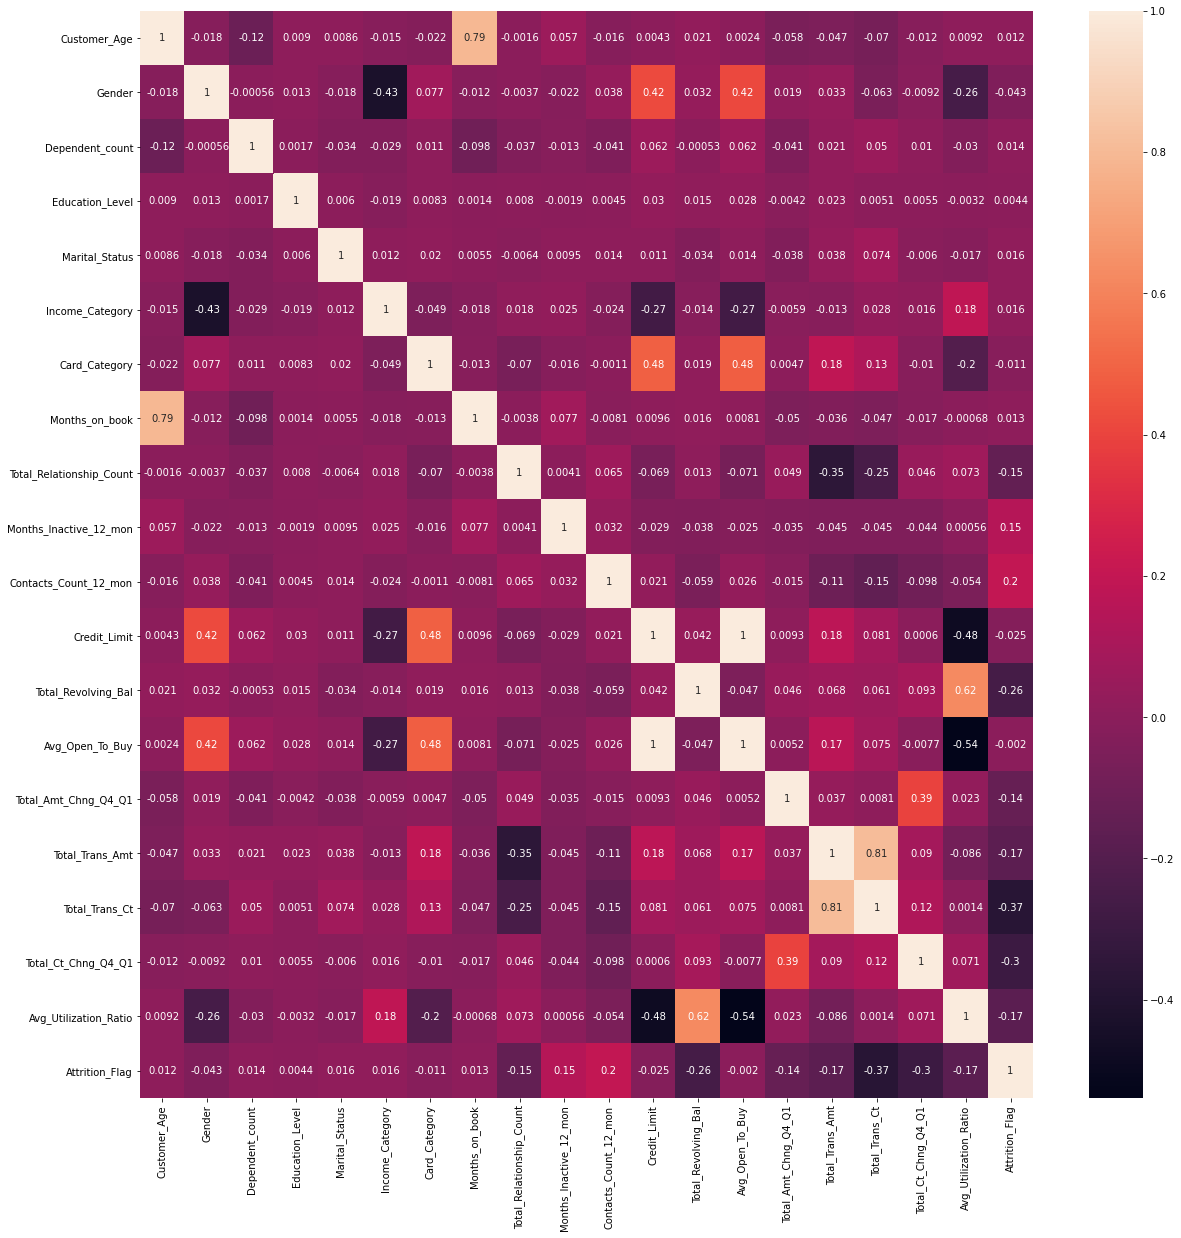

In [30]:
import seaborn as sns
plt.figure(figsize = (20, 20))
sns.heatmap(train_label.corr(),annot=True)

Customer_Age와 Months_on_book, 그리고 Total_Trans_Amt, Total_Trans_Ct가 상관계수가 눈에 띄게 높다는 것을 볼 수 있다. 때문에 Months_on_book과 Total_Trans_Ct를 없앤 DataFrame도 생성해두었다.

In [31]:
train_drop = train_label.drop(columns=['Months_on_book','Total_Trans_Ct'],axis=1)

In [32]:
test_drop = test_label.drop(columns=['Months_on_book','Total_Trans_Ct'],axis=1)

# Model

저는 라벨인코딩만을 이용한 간단한 베이스 라인 모델을 만들었습니다.

17기 분들은 feature engineering, 하이퍼 파라미터 튜닝, 앙상블 등 다양한 방법으로 성능이 우수한 모델을 만들어보세요!

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
y = train_label['Attrition_Flag'] # features
X = train_label.drop(columns=['Attrition_Flag'],axis=1)  # labels
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify = y)

In [35]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(6480, 19)
(1621, 19)
(6480,)
(1621,)


In [36]:
from sklearn.preprocessing import StandardScaler

In [37]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [38]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import *
from xgboost import XGBClassifier

In [50]:
param = {
    'learning_rate' :[0.01,0.1],
    'max_depth': [2,4,6,8,10],
    'min_child_weight':[1,3,5,7]
}

In [54]:
model = XGBClassifier(random_state=1, verbosity=1)

grid_search = GridSearchCV(estimator=model,
                           param_grid=param
                           )

In [64]:
best_model = grid_search.fit(X_train, y_train, eval_metric="logloss",verbose=True)

In [65]:
best_model.best_params_

{'learning_rate': 0.1, 'max_depth': 6, 'min_child_weight': 1}

In [68]:
model_xgb = XGBClassifier(random_state=1, verbosity=1, learning_rate = 0.1, max_depth=6,min_child_weight=1)
model_xgb.fit(X,y)

[15:50:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.1, max_delta_step=0,
              max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=1,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=1)

In [69]:
y_pred = model_xgb.predict_proba(test_label)

In [70]:
y_pred

array([[9.90699708e-01, 9.30027571e-03],
       [9.88607049e-01, 1.13929724e-02],
       [8.97704542e-01, 1.02295466e-01],
       ...,
       [9.99493897e-01, 5.06101409e-04],
       [9.99166906e-01, 8.33083817e-04],
       [9.99011397e-01, 9.88598331e-04]], dtype=float32)

# 예측

저는 Stacking 사용했지만 17기 분들은 다양한 방식을 활용해서 모델의 성능을 높여주세요!

In [71]:
submission.iloc[:, 1:] = y_pred
submission.to_csv(data_dir + 'your_model.csv', index = False)
submission.head()

,id,Existing Customer,Attrited Customer
0,0,0.990700,0.009300
1,1,0.988607,0.011393
2,2,0.897705,0.102295
3,3,0.994238,0.005762
4,4,0.998993,0.001007
